In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.decomposition import PCA
import pickle


# Intensity Profiles Data Processing

Loads pickled data files for intensity profiles, thresholds, cilia lengths, and subcellular annotations. Performs background subtraction by removing threshold values from intensity profiles, clips negative values to zero, and normalizes by dividing by maximum intensity (min 15,000). Flattens dictionary data into lists, applies Gaussian smoothing (σ=7) to reduce noise, and handles NaN values. Creates final processed `intensity_profiles` array with corresponding metadata lists.

In [ ]:
intensity_profiles = pickle.load(open('intensity_profiles_A_all.pkl', 'rb'))
thresholds = pickle.load(open('thresholds_all.pkl', 'rb'))
intensity_profiles_list = []

for key in intensity_profiles:
    if len(intensity_profiles[key]) == 0:
        continue
    intensity_profiles[key] = np.array(intensity_profiles[key])
    for i in range(len(intensity_profiles[key])):
        intensity_profiles[key][i] = intensity_profiles[key][i] - thresholds[key][i]
    
    intensity_profiles[key][intensity_profiles[key] < 0] = 0
    
    max_ = max(15000, np.max(intensity_profiles[key]))
    intensity_profiles[key] = intensity_profiles[key] / max_

# for key in intensity_profiles:
#     intensity_profiles[key] = intensity_profiles[key] / max_


cilia_lengths = pickle.load(open('cilia_lengths_all.pkl', 'rb'))
cilia_lengths_list = []
subcellular_locations = pickle.load(open('annotations_all.pkl', 'rb'))
subcellular_locations_list = []
for key in intensity_profiles:
    for row in intensity_profiles[key]:
        intensity_profiles_list.append(row)
    for row in cilia_lengths[key]:
        cilia_lengths_list.append(row)
    for row in subcellular_locations[key]:
        subcellular_locations_list.append(row)


intensity_profiles = np.array(intensity_profiles_list)

# smooth the data by row
intensity_profiles = scipy.ndimage.gaussian_filter1d(intensity_profiles, axis=1, sigma=7)

# nan values are not allowed
intensity_profiles = np.nan_to_num(intensity_profiles)

FileNotFoundError: [Errno 2] No such file or directory: 'intensity_profiles_A_all.pkl'

In [ ]:
print(len(intensity_profiles))

128123


### UMAP plots colored by subcellular annotations
for protein with more than one annotation, we pick a random one

### Average intensity profiles: proteins with multiple localizations will be counted multiuple times

In [ ]:
indices = [i for i in range(len(intensity_profiles)) if "Primary cilium transition zone" in subcellular_locations_list[i]]
transition_zone = np.median(intensity_profiles[indices], axis=0)
transition_zone_25 = np.percentile(intensity_profiles[indices], 25, axis=0)
transition_zone_75 = np.percentile(intensity_profiles[indices], 75, axis=0)
print("Primary cilium transition zone")
print(len(indices))

indices = [i for i in range(len(intensity_profiles)) if "Primary cilium" in subcellular_locations_list[i]]
cilium = np.median(intensity_profiles[indices], axis=0)
cilium_25 = np.percentile(intensity_profiles[indices], 25, axis=0)
cilium_75 = np.percentile(intensity_profiles[indices], 75, axis=0)
print("Primary cilium")
print(len(indices))

indices = [i for i in range(len(intensity_profiles)) if "Primary cilium tip" in subcellular_locations_list[i]]
tip = np.median(intensity_profiles[indices], axis=0)
tip_25 = np.percentile(intensity_profiles[indices], 25, axis=0)
tip_75 = np.percentile(intensity_profiles[indices], 75, axis=0)
print("Primary cilium tip")
print(len(indices))

indices = [i for i in range(len(intensity_profiles)) if "Basal body" in subcellular_locations_list[i]]
basal_body = np.median(intensity_profiles[indices], axis=0)
basal_body_25 = np.percentile(intensity_profiles[indices], 25, axis=0)
basal_body_75 = np.percentile(intensity_profiles[indices], 75, axis=0)
print("Basal body")
print(len(indices))

# negative controls, no annotations of all 4 structures
indices = [i for i in range(len(intensity_profiles)) if sum([structure in subcellular_locations_list[i] for structure in ["Primary cilium transition zone", "Primary cilium", "Primary cilium tip", "Basal body"]]) == 0 and "Unknown" not in subcellular_locations_list[i]]
no_cilia_annotations = np.median(intensity_profiles[indices], axis=0)
no_cilia_annotations_25 = np.percentile(intensity_profiles[indices], 25, axis=0)
no_cilia_annotations_75 = np.percentile(intensity_profiles[indices], 75, axis=0)
print("No cilia annotations")
print(len(indices))

# negative controls, no annotations at all
indices = [i for i in range(len(intensity_profiles)) if len(subcellular_locations_list[i]) == 0]
no_annotations = np.median(intensity_profiles[indices], axis=0)
no_annotations_25 = np.percentile(intensity_profiles[indices], 25, axis=0)
no_annotations_75 = np.percentile(intensity_profiles[indices], 75, axis=0)
print("No annotations")
print(len(indices))


# plot with shaded areas
plt.fill_between(range(len(transition_zone)), transition_zone_25, transition_zone_75, color='blue', alpha=0.2)
plt.plot(transition_zone, color='blue', label='Primary cilium transition zone')

plt.fill_between(range(len(cilium)), cilium_25, cilium_75, color='green', alpha=0.2)
plt.plot(cilium, color='green', label='Primary cilium')

plt.fill_between(range(len(tip)), tip_25, tip_75, color='red', alpha=0.2)
plt.plot(tip, color='red', label='Primary cilium tip')

plt.fill_between(range(len(basal_body)), basal_body_25, basal_body_75, color='orange', alpha=0.2)
plt.plot(basal_body, color='orange', label='Basal body')

plt.fill_between(range(len(no_cilia_annotations)), no_cilia_annotations_25, no_cilia_annotations_75, color='cyan', alpha=0.2)
plt.plot(no_cilia_annotations, color='cyan', label='No cilia annotations')

plt.fill_between(range(len(no_annotations)), no_annotations_25, no_annotations_75, color='gray', alpha=0.2)
plt.plot(no_annotations, color='gray', label='No annotations')

plt.xlabel('Position along the cilium')
plt.ylabel('Intensity')
plt.legend()
plt.title('Average intensity profiles for different subcellular locations (MIXED)')
# save svg
plt.savefig('average_intensity_profiles_mixed.svg', format='svg', dpi=1200)



NameError: name 'intensity_profiles' is not defined

### Average intensity profiles: only for single localizing proteins

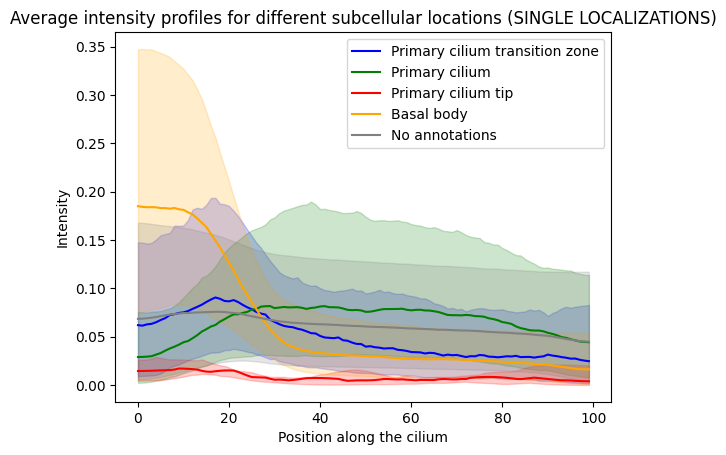

In [ ]:
# indices with only Primary cilium transition zone as 1 and the rest as 0
indices = [i for i in range(len(intensity_profiles)) if "Primary cilium transition zone" in subcellular_locations_list[i] and len(subcellular_locations_list[i]) == 1]
transition_zone = np.median(intensity_profiles[indices], axis=0)
transition_zone_25 = np.percentile(intensity_profiles[indices], 25, axis=0)
transition_zone_75 = np.percentile(intensity_profiles[indices], 75, axis=0)

indices = [i for i in range(len(intensity_profiles)) if "Primary cilium" in subcellular_locations_list[i] and len(subcellular_locations_list[i]) == 1]
cilium = np.median(intensity_profiles[indices], axis=0)
cilium_25 = np.percentile(intensity_profiles[indices], 25, axis=0)
cilium_75 = np.percentile(intensity_profiles[indices], 75, axis=0)

indices = [i for i in range(len(intensity_profiles)) if "Primary cilium tip" in subcellular_locations_list[i] and len(subcellular_locations_list[i]) == 1]
tip = np.median(intensity_profiles[indices], axis=0)
tip_25 = np.percentile(intensity_profiles[indices], 25, axis=0)
tip_75 = np.percentile(intensity_profiles[indices], 75, axis=0)

indices = [i for i in range(len(intensity_profiles)) if "Basal body" in subcellular_locations_list[i] and len(subcellular_locations_list[i]) == 1]
basal_body = np.median(intensity_profiles[indices], axis=0)
basal_body_25 = np.percentile(intensity_profiles[indices], 25, axis=0)
basal_body_75 = np.percentile(intensity_profiles[indices], 75, axis=0)

# negative controls, no annotations of all 4 structures
indices = [i for i in range(len(intensity_profiles)) if sum([structure in subcellular_locations_list[i] for structure in ["Primary cilium transition zone", "Primary cilium", "Primary cilium tip", "Basal body"]]) == 0]
no_annotations = np.median(intensity_profiles[indices], axis=0)
no_annotations_25 = np.percentile(intensity_profiles[indices], 25, axis=0)
no_annotations_75 = np.percentile(intensity_profiles[indices], 75, axis=0)

# plot with shaded areas
plt.fill_between(range(len(transition_zone)), transition_zone_25, transition_zone_75, color='blue', alpha=0.2)
plt.plot(transition_zone, color='blue', label='Primary cilium transition zone')

plt.fill_between(range(len(cilium)), cilium_25, cilium_75, color='green', alpha=0.2)
plt.plot(cilium, color='green', label='Primary cilium')

plt.fill_between(range(len(tip)), tip_25, tip_75, color='red', alpha=0.2)
plt.plot(tip, color='red', label='Primary cilium tip')

plt.fill_between(range(len(basal_body)), basal_body_25, basal_body_75, color='orange', alpha=0.2)
plt.plot(basal_body, color='orange', label='Basal body')

plt.fill_between(range(len(no_annotations)), no_annotations_25, no_annotations_75, color='gray', alpha=0.2)
plt.plot(no_annotations, color='gray', label='No annotations')

plt.xlabel('Position along the cilium')
plt.ylabel('Intensity')
plt.legend()
plt.title('Average intensity profiles for different subcellular locations (SINGLE LOCALIZATIONS)')
# save svg
plt.savefig('average_intensity_profiles_single_localizations.svg', format='svg', dpi=1200)

### UMAP annotated by cilia lengths (temporarily skip this part)

# SINGLE PROTEIN ANALYSIS

In [ ]:
# reload the data
intensity_profiles = pickle.load(open('intensity_profiles_A_all.pkl', 'rb'))
thresholds = pickle.load(open('thresholds_all.pkl', 'rb'))
intensity_profiles_list = []
max_ = 0
for key in intensity_profiles:
    if len(intensity_profiles[key]) == 0:
        continue
    intensity_profiles[key] = np.array(intensity_profiles[key])
    for i in range(len(intensity_profiles[key])):
        intensity_profiles[key][i] = intensity_profiles[key][i] - thresholds[key][i]
    
    intensity_profiles[key][intensity_profiles[key] < 0] = 0
    
    max_ = max(15000, np.max(intensity_profiles[key]))
    intensity_profiles[key] = intensity_profiles[key] / max_

# for key in intensity_profiles:
#     intensity_profiles[key] = intensity_profiles[key] / max_

### Analysis of CKAP2
# Intensity Profile Visualization by Cell Line

Creates comparison plots of intensity profiles across three different cell lines. Defines specific sample keys (`2167_B1`, `2127_E8`, `2123_B2`) corresponding to cell lines ASC52telo, RPTEC/TERT1, and hTERT-RPE1 (serum starved). Loads cilia length data and extracts intensity profiles for each sample, applying additional Gaussian smoothing (σ=8). 

Generates a 1x3 subplot figure where each panel shows intensity profiles for one cell line, with individual profiles color-coded by cilia length using the viridis colormap (normalized 0-10 μm range). All subplots share the same y-axis scale (0-1) for direct comparison. Includes a shared colorbar indicating the cilia length mapping.

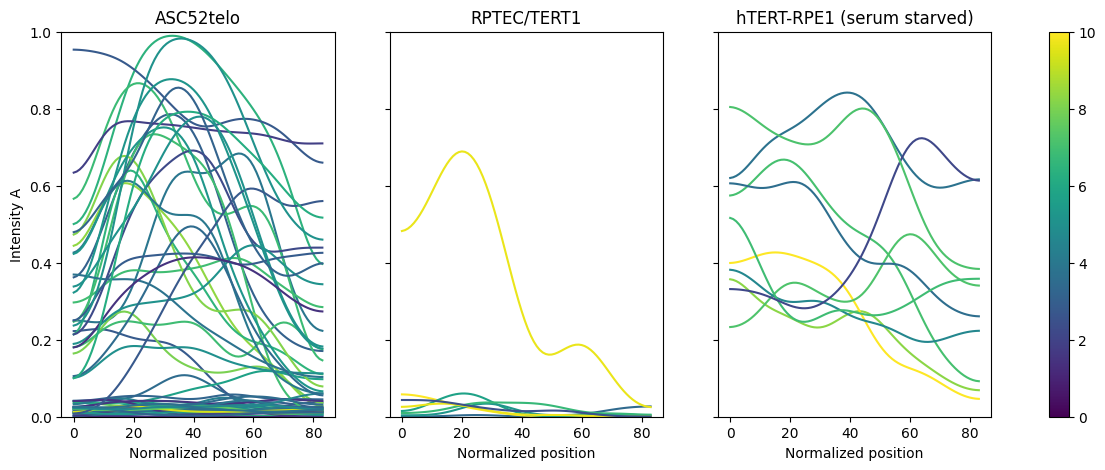

In [ ]:
key1 = "2167_B1"
key2 = "2127_E8"
key3 = "2123_B2"

cell_line1 = "ASC52telo"
cell_line2 = "RPTEC/TERT1"
cell_line3 = "hTERT-RPE1 (serum starved)"



cilia_lengths = pickle.load(open('cilia_lengths_all.pkl', 'rb'))
length1 = cilia_lengths[key1]
length2 = cilia_lengths[key2]
length3 = cilia_lengths[key3]

# get their profiles
profile1 = intensity_profiles[key1]
profile1 = scipy.ndimage.gaussian_filter1d(profile1, axis=1, sigma=8)
profile2 = intensity_profiles[key2]
profile2 = scipy.ndimage.gaussian_filter1d(profile2, axis=1, sigma=8)
profile3 = intensity_profiles[key3]
profile3 = scipy.ndimage.gaussian_filter1d(profile3, axis=1, sigma=8)

# 1x3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
# color by the length
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(0, 10)
for i in range(len(length1)):
    axs[0].plot(profile1[i], color=cmap(norm(length1[i])))
axs[0].set_title(cell_line1)
axs[0].set_ylabel('Intensity A')
axs[0].set_xlabel('Normalized position')
for i in range(len(length2)):
    axs[1].plot(profile2[i], color=cmap(norm(length2[i])))
axs[1].set_title(cell_line2)
axs[1].set_xlabel('Normalized position')
for i in range(len(length3)):
    axs[2].plot(profile3[i], color=cmap(norm(length3[i])))
axs[2].set_title(cell_line3)
axs[2].set_xlabel('Normalized position')

plt.ylim(0, 1)

plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs)



### Analysis of ACVR1B
Colors in the plots refer to the cilia lengths

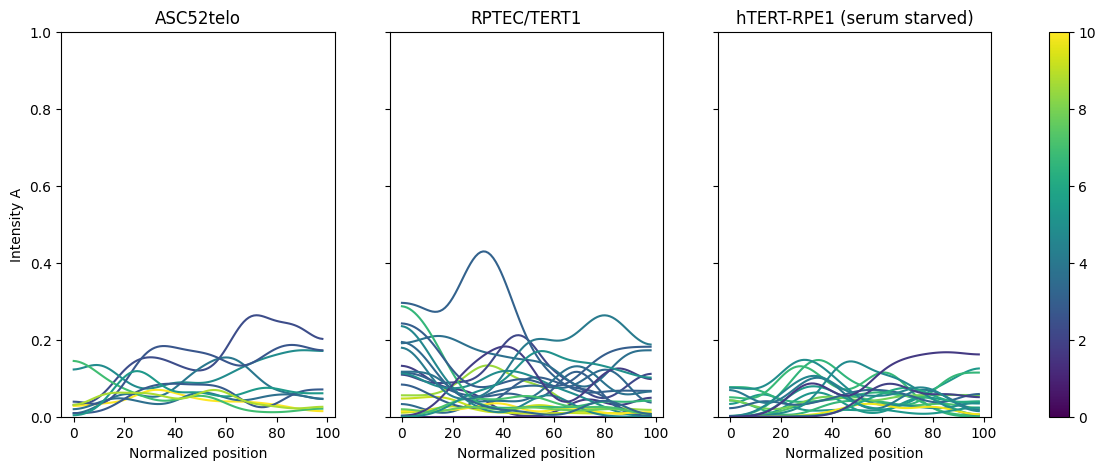

In [ ]:
key1 = "2177_B10"
key2 = "2234_H11"
key3 = "2160_G12"

cell_line1 = "ASC52telo"
cell_line2 = "RPTEC/TERT1"
cell_line3 = "hTERT-RPE1 (serum starved)"


cilia_lengths = pickle.load(open('cilia_lengths_all.pkl', 'rb'))
length1 = cilia_lengths[key1]
length2 = cilia_lengths[key2]
length3 = cilia_lengths[key3]

# get their profiles
profile1 = intensity_profiles[key1]
profile1 = scipy.ndimage.gaussian_filter1d(profile1, axis=1, sigma=8)
profile2 = intensity_profiles[key2]
profile2 = scipy.ndimage.gaussian_filter1d(profile2, axis=1, sigma=8)
profile3 = intensity_profiles[key3]
profile3 = scipy.ndimage.gaussian_filter1d(profile3, axis=1, sigma=8)

# 1x3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
# color by the length
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(0, 10)
for i in range(len(length1)):
    axs[0].plot(profile1[i], color=cmap(norm(length1[i])))
axs[0].set_title(cell_line1)
axs[0].set_ylabel('Intensity A')
axs[0].set_xlabel('Normalized position')
for i in range(len(length2)):
    axs[1].plot(profile2[i], color=cmap(norm(length2[i])))
axs[1].set_title(cell_line2)
axs[1].set_xlabel('Normalized position')
for i in range(len(length3)):
    axs[2].plot(profile3[i], color=cmap(norm(length3[i])))
axs[2].set_title(cell_line3)
axs[2].set_xlabel('Normalized position')

plt.ylim(0, 1)

plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs)

### PIK3CA

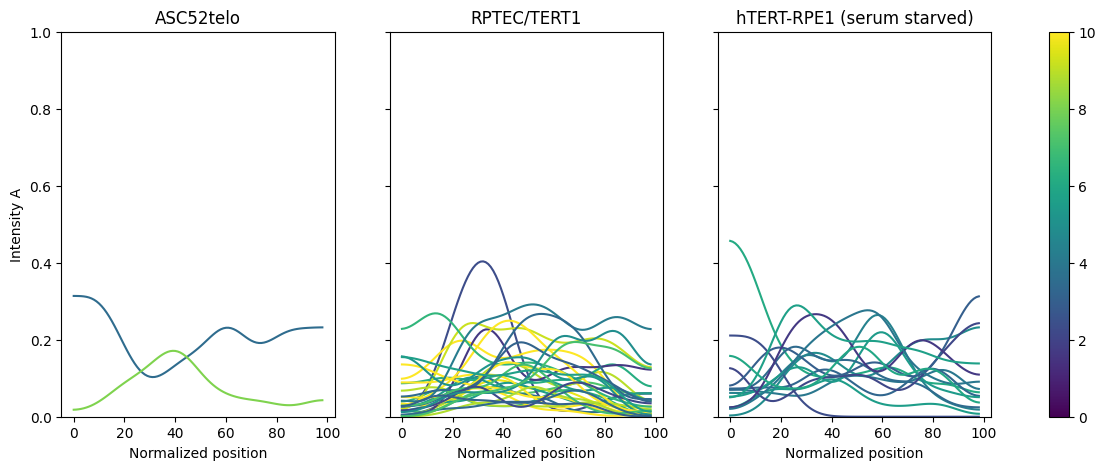

In [ ]:
key1 = "2168_G12"
key2 = "2136_E4"
key3 = "2151_G6"

cell_line1 = "ASC52telo"
cell_line2 = "RPTEC/TERT1"
cell_line3 = "hTERT-RPE1 (serum starved)"


cilia_lengths = pickle.load(open('cilia_lengths_all.pkl', 'rb'))
length1 = cilia_lengths[key1]
length2 = cilia_lengths[key2]
length3 = cilia_lengths[key3]

# get their profiles
profile1 = intensity_profiles[key1]
profile1 = scipy.ndimage.gaussian_filter1d(profile1, axis=1, sigma=8)
profile2 = intensity_profiles[key2]
profile2 = scipy.ndimage.gaussian_filter1d(profile2, axis=1, sigma=8)
profile3 = intensity_profiles[key3]
profile3 = scipy.ndimage.gaussian_filter1d(profile3, axis=1, sigma=8)

# 1x3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
# color by the length
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(0, 10)
for i in range(len(length1)):
    axs[0].plot(profile1[i], color=cmap(norm(length1[i])))
axs[0].set_title(cell_line1)
axs[0].set_ylabel('Intensity A')
axs[0].set_xlabel('Normalized position')
for i in range(len(length2)):
    axs[1].plot(profile2[i], color=cmap(norm(length2[i])))
axs[1].set_title(cell_line2)
axs[1].set_xlabel('Normalized position')
for i in range(len(length3)):
    axs[2].plot(profile3[i], color=cmap(norm(length3[i])))
axs[2].set_title(cell_line3)
axs[2].set_xlabel('Normalized position')

plt.ylim(0, 1)

plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs)

### PTK2

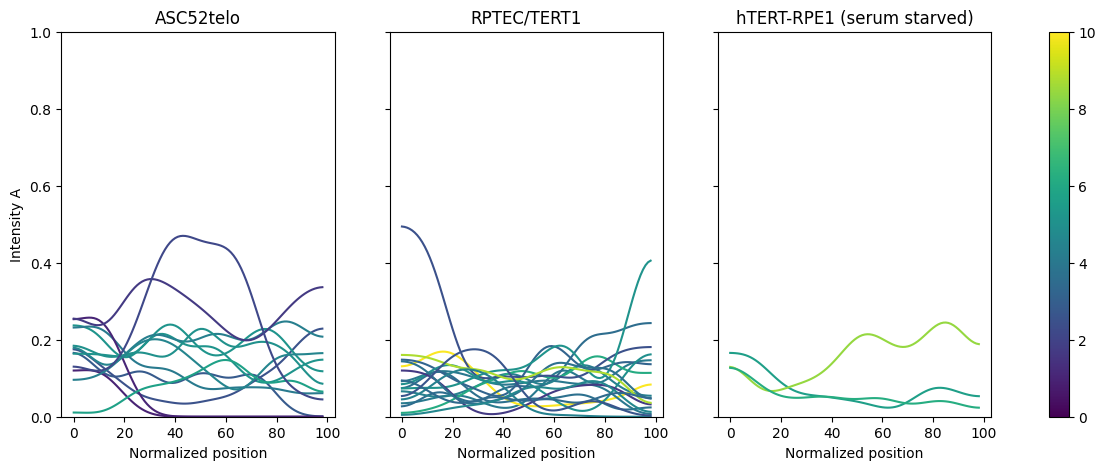

In [ ]:
key1 = "2169_G10"
key2 = "2149_H5"
key3 = "2151_E9"

cell_line1 = "ASC52telo"
cell_line2 = "RPTEC/TERT1"
cell_line3 = "hTERT-RPE1 (serum starved)"


cilia_lengths = pickle.load(open('cilia_lengths_all.pkl', 'rb'))
length1 = cilia_lengths[key1]
length2 = cilia_lengths[key2]
length3 = cilia_lengths[key3]

# get their profiles
profile1 = intensity_profiles[key1]
profile1 = scipy.ndimage.gaussian_filter1d(profile1, axis=1, sigma=8)
profile2 = intensity_profiles[key2]
profile2 = scipy.ndimage.gaussian_filter1d(profile2, axis=1, sigma=8)
profile3 = intensity_profiles[key3]
profile3 = scipy.ndimage.gaussian_filter1d(profile3, axis=1, sigma=8)

# 1x3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
# color by the length
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(0, 10)
for i in range(len(length1)):
    axs[0].plot(profile1[i], color=cmap(norm(length1[i])))
axs[0].set_title(cell_line1)
axs[0].set_ylabel('Intensity A')
axs[0].set_xlabel('Normalized position')
for i in range(len(length2)):
    axs[1].plot(profile2[i], color=cmap(norm(length2[i])))
axs[1].set_title(cell_line2)
axs[1].set_xlabel('Normalized position')
for i in range(len(length3)):
    axs[2].plot(profile3[i], color=cmap(norm(length3[i])))
axs[2].set_title(cell_line3)
axs[2].set_xlabel('Normalized position')

plt.ylim(0, 1)

plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs)